Automatically created module for IPython interactive environment


<Figure size 432x288 with 0 Axes>

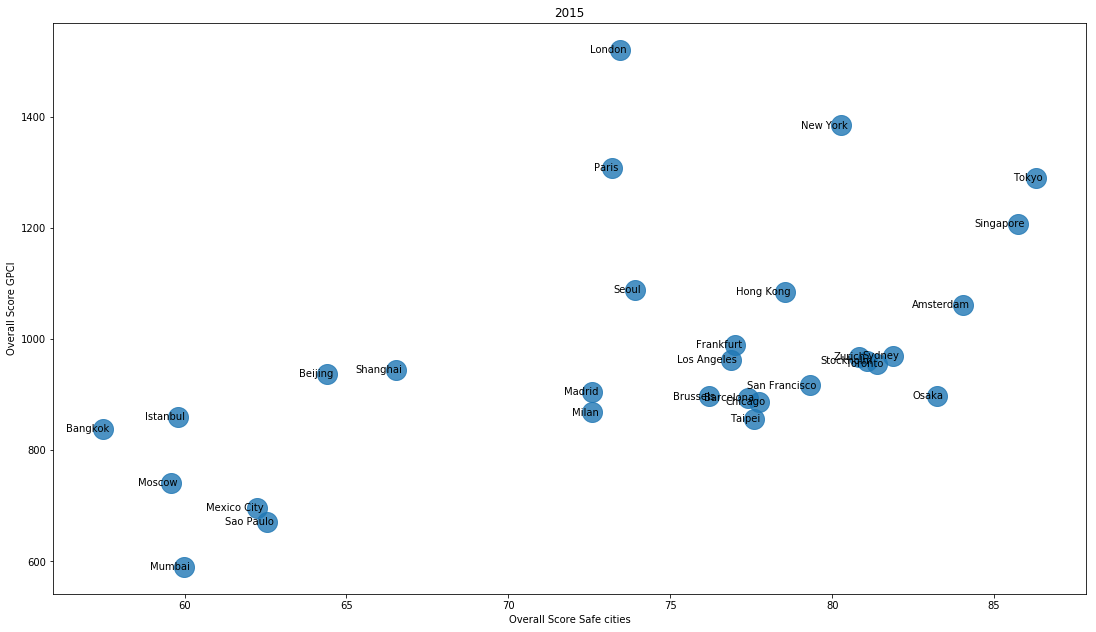

<Figure size 432x288 with 0 Axes>

In [2]:
##################################################################
######2015###########
print(__doc__)
import pandas as pd
import matplotlib.pyplot as plt
#Import data and select 2015
series = pd.read_csv('D:\myfolders\orase_2015.csv', header=0)




#Scatter of the two components
import seaborn as sns
plt.figure(figsize=(18.5,10.5))
# basic plot
p1=sns.regplot(data=series, x="Overall_Score_Safe_cities", y="Overall_Score_GPCI", fit_reg=False, scatter_kws={'s':400})
for line in range(0,series.shape[0]):
     p1.text(series.Overall_Score_Safe_cities[line]+0.2, series.Overall_Score_GPCI[line], series.City[line], 
           horizontalalignment='right',   verticalalignment='center', color='black')
# add annotations one by one with a loop
plt.title('2015')   
plt.xlabel('Overall Score Safe cities', color='black')
plt.ylabel('Overall Score GPCI', color='black')
plt.figure()



Results for 2015
                          Factor1   Factor2
Accessibility            0.205821  0.613276
Cultural_Interaction    -0.090017  0.882330
Digital_Security         0.682473  0.239454
Economy                  0.309395  0.745682
Environment              0.733537  0.113749
Health_Security          0.748034  0.196977
Infrastructure_security  0.754943  0.105667
Livability               0.601322  0.070209
Personal_Security        0.771933  0.227626
Research_Development     0.254137  0.801096
                 Factor1   Factor2
SS Loadings     3.301583  2.529396
Proportion Var  0.330158  0.252940
Cumulative Var  0.330158  0.583098


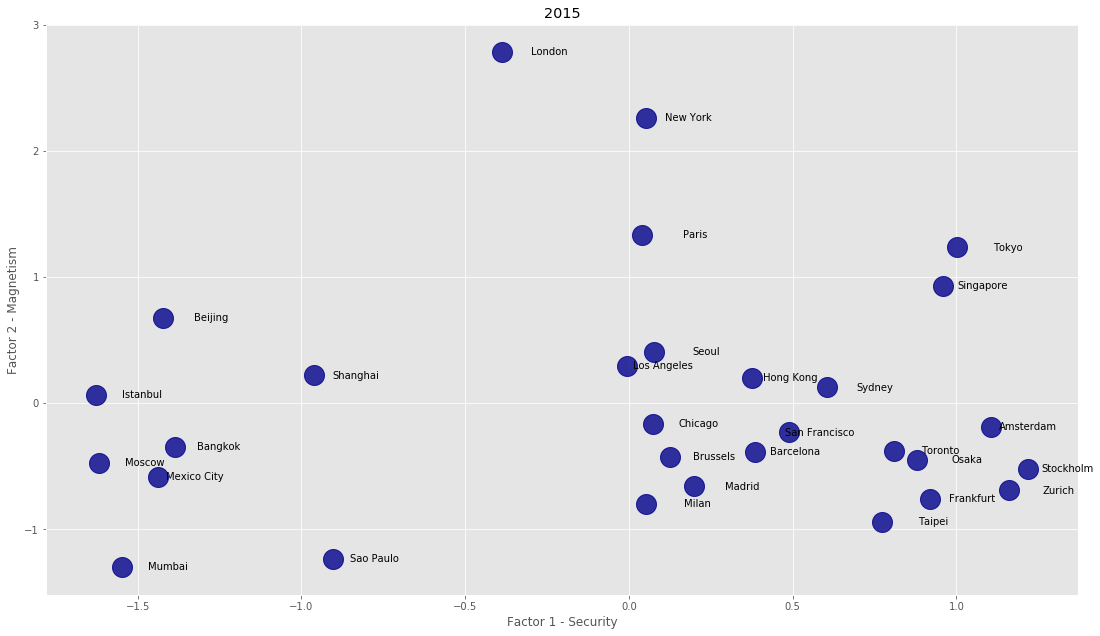

<Figure size 432x288 with 0 Axes>

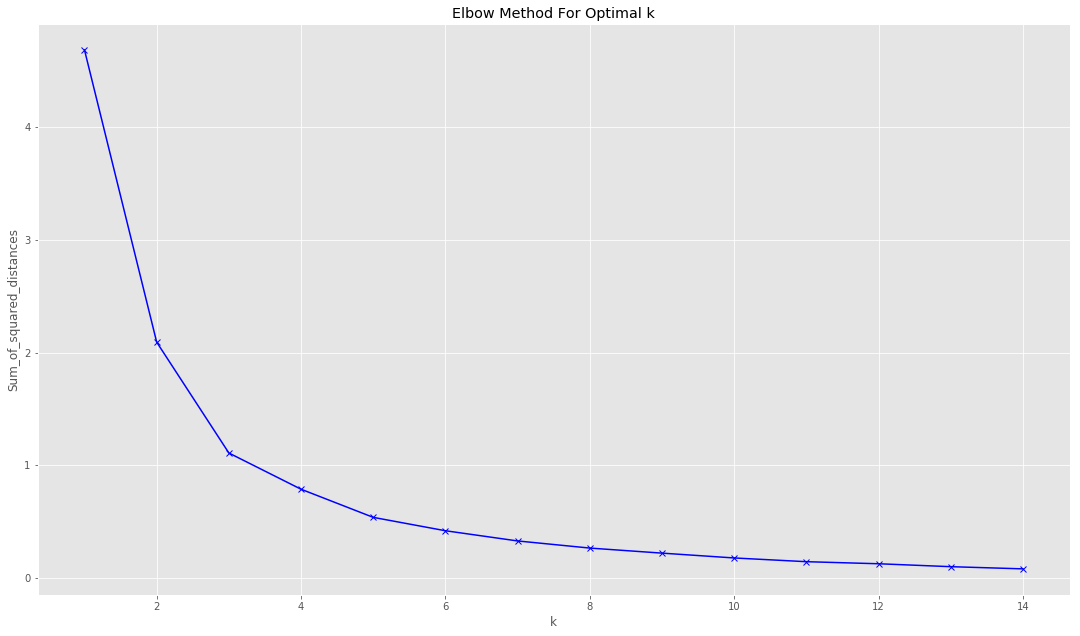

[[-0.16825577  2.52125447]
 [ 0.23742086 -0.16400628]
 [-1.36314712 -0.37128696]
 [ 0.66689377  1.16628152]
 [ 0.98097122 -0.56157072]]


,Factor1,Factor2,Cluster,City
0,1.106940,-0.188124,3,Amsterdam
1,-1.386282,-0.345144,0,Bangkok
2,0.383691,-0.386242,1,Barcelona
3,-1.421667,0.676045,0,Beijing
4,0.124483,-0.426274,1,Brussels
5,0.074632,-0.166353,1,Chicago
6,0.919177,-0.756948,3,Frankfurt
7,0.374866,0.203448,1,Hong Kong
8,-1.627112,0.063727,0,Istanbul
9,-0.388292,2.782981,4,London


In [12]:

# Separating out the variables
vars=['Accessibility', 'Cultural_Interaction',
            'Digital_Security', 'Economy', 'Environment',
            'Health_Security', 'Infrastructure_security',
            'Livability', 'Personal_Security', 'Research_Development']
x=series[vars]

# Separating out the features
X = x.values
print('Results for 2015')
#Factor Analysis
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()

fa.analyze(x, 2, rotation='varimax')

loadings=fa.loadings
print(loadings)

factor_variance=fa.get_factor_variance()
print(factor_variance)
X_factor=fa.get_scores(x)


factor=pd.DataFrame(X_factor, columns=['Factor1', 'Factor2' ]) 

df=pd.concat([factor, series[['City']]], axis = 1)

#Scatter of the two components
import seaborn as sns
plt.figure(figsize=(18.5,10.5))
# basic plot
p1=sns.regplot(data=df, x="Factor1", y="Factor2", fit_reg=False, marker="o", color="darkblue", scatter_kws={'s':400})
for line in range(0,df.shape[0]):
     p1.text(df.Factor1[line]+0.2, df.Factor2[line], df.City[line], 
           horizontalalignment='right',   verticalalignment='center', color='black')
# add annotations one by one with a loop
plt.title('2015')   
plt.xlabel('Factor 1 - Security')
plt.ylabel('Factor 2 - Magnetism')
plt.figure()

#;

# Data Preprocessing

# Importing the Library 
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# Importing the dataset
x=factor.values

from sklearn.cluster import KMeans
mms = MinMaxScaler()
mms.fit(x)
data_transformed = mms.transform(x)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(18.5,10.5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.title('2015')   
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


# create kmeans object
kmeans = KMeans(n_clusters=5)

# fit kmeans object to data
kmeans.fit(x)

# print location of clusters learned by kmeans object
C=kmeans.cluster_centers_

print(C)
# save new clusters for chart
y_km = kmeans.fit_predict(x)

clusters=pd.DataFrame(y_km, columns=['Cluster'])
df=pd.concat([factor, clusters, series[['City']]], axis = 1)
df



"\ncolors = ['red', 'green', 'blue', 'lightblue', 'cyan']\nplt.figure()\nplt.hold(True)\nfor k, col in zip(range(n_clusters), colors):\n    my_members = k_means_labels == k\n    cluster_center = k_means_cluster_centers[k]\n    plt.plot(X[my_members, 0], X[my_members, 1], 'w',\n            markerfacecolor=col, marker='.')\n    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,\n            markeredgecolor='k', markersize=6)\nplt.title('KMeans')    \nplt.grid(True)\nplt.show()\n"

<Figure size 432x288 with 0 Axes>

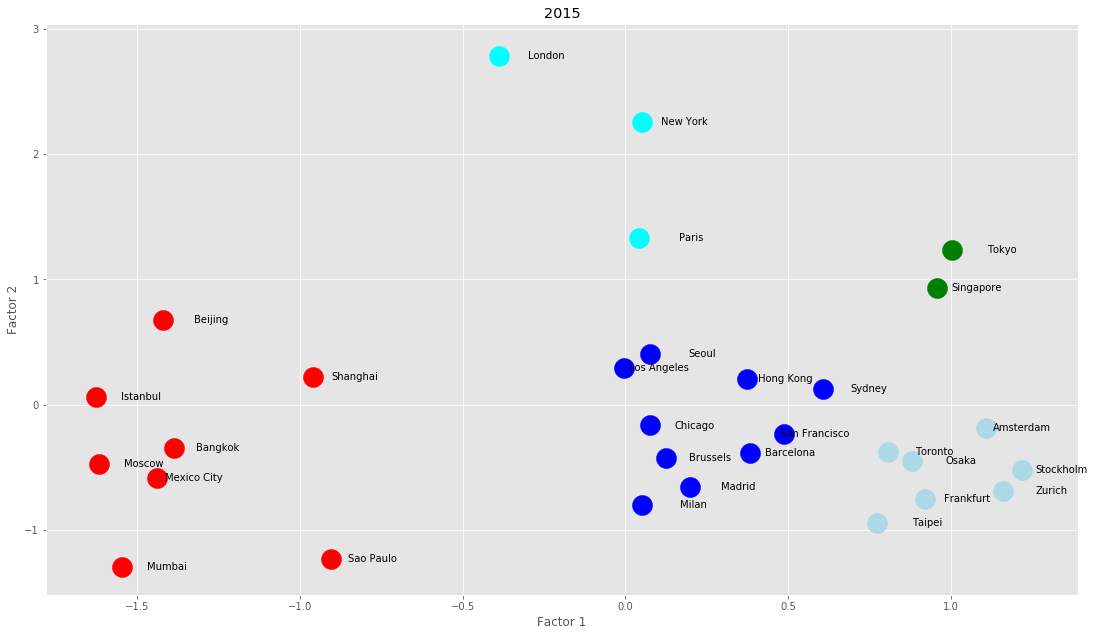

In [13]:
plt.figure()

plt.figure(figsize=(18.5,10.5))
plt.scatter(x[y_km ==0,0], x[y_km == 0,1], s=400, c='red')
plt.scatter(x[y_km ==1,0], x[y_km == 1,1], s=400, c='blue')
plt.scatter(x[y_km ==2,0], x[y_km == 2,1], s=400, c='green')
plt.scatter(x[y_km ==3,0], x[y_km == 3,1], s=400, c='lightblue')
plt.scatter(x[y_km ==4,0], x[y_km == 4,1], s=400, c='cyan')

for line in range(0,df.shape[0]):
    plt.text(df.Factor1[line]+0.2, df.Factor2[line], df.City[line], 
          horizontalalignment='right',   verticalalignment='center', color='black')
plt.title('2015')    
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
# add annotations one by one with a loop
#plt.scatter(x[y_km ==3,0], x[y_km == 3,1], s=100, c='cyan')
#plt.scatter(x[y_km ==4,0], x[y_km == 4,1], s=100, c='green')
'''
colors = ['red', 'green', 'blue', 'lightblue', 'cyan']
plt.figure()
plt.hold(True)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
plt.title('KMeans')    
plt.grid(True)
plt.show()
'''

In [14]:
from sklearn import svm
import numpy as np

X = factor # we only take the Sepal two features.
y = clusters
C = 1.0  # SVM regularization parameter
 
# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(X, y)
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

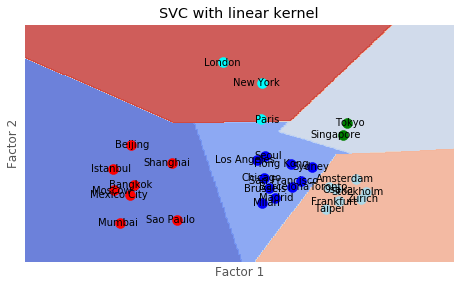

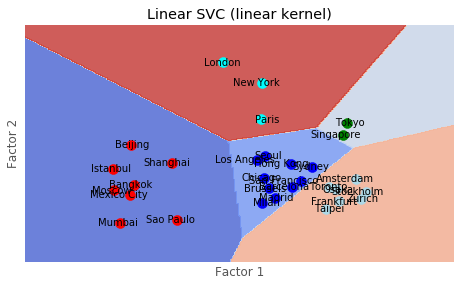

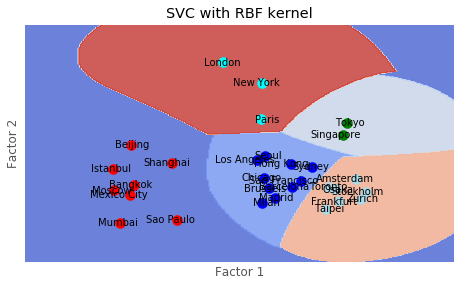

In [15]:
h = .02  # step size in the mesh

# create a mesh to plot in

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
   'Linear SVC (linear kernel)',
  'SVC with RBF kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].

    plt.figure(figsize=(18.5,10.5))
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
 
    plt.scatter(x[y_km ==0,0], x[y_km == 0,1], s=100, c='red')
    plt.scatter(x[y_km ==1,0], x[y_km == 1,1], s=100, c='blue')
    plt.scatter(x[y_km ==2,0], x[y_km == 2,1], s=100, c='green')
    plt.scatter(x[y_km ==3,0], x[y_km == 3,1], s=100, c='lightblue')
    plt.scatter(x[y_km ==4,0], x[y_km == 4,1], s=100, c='cyan')

    for line in range(0,df.shape[0]):
        plt.text(df.Factor1[line]+0.2, df.Factor2[line], df.City[line], 
          horizontalalignment='right',   verticalalignment='center', color='black')
    plt.title('2015')    
    plt.xlabel('Factor 1')
    plt.ylabel('Factor 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [16]:
# Separating out the variables
secondary_vars=[' Nominal GDP  ',
' GDP per Capita',
' GDP Growth Rate',
' Level of Economic Freedom',
' Total Market Value of Listed Shares on Stock Exchanges',
' World Top 300 Companies',
' Total Employees',
' Number of Employees in Service Industry for Business Enterprises',
' Wage Level',
' Ease of Securing Human Resources',
'Office Space per Desk',
' Corporate Tax Rate',
' Level of Political, Economic and Business Risk',
' Number of Researchers',
' World Top 200 Universities',
'  Academic Performance in Mathematics and Science',
'  Readiness for Accepting Foreign Researchers',
' Research and Development Expenditure',
' Number of Registered Industrial Property Rights (Patents)',
' Number of Winners of HighlyReputed Prizes (Science and Technologyrelated Fields)',
'  Interaction OOpportunities between Researchers',
'  Number of International Conferences Held',
' Number of Large WorldClass Cultural Events Held',
' Trade Value of Audiovisual and Related Services?',
'  Environment of Creative Activities',
' Number of World Heritage Sites (within 100km Area)',
' Opportunities for Cultural, Historical and Traditional Interaction   ',
'Number of Theaters and Concert Halls',
' Number of Museums',
'  Number of Stadiums',
' Number of Luxury Hotel Guest Rooms  ',
'  Number of Hotels  ',
' Attractiveness of Shopping Options',
'  Attractiveness of Dining Options',
'  Number of Foreign Residents',
' Number of Visitors from Abroad',
'  Number of International Students',
' Total Unemployment Rate',
' Total Working Hours',
' Level of Satisfaction of Employees with Their Lives',
' Average House Rent ',
' Price Level',
'  Number of Murders per Population',
'  Disaster Vulnerability  ',
'  Life Expectancy at Age 60',
' Openness and Fairness of Society',
' Number of Medical Doctors per Population',
'  Population Density',
' Number of International Schools',
'  Variety of Retail Shops',
'  Variety of Restaurants',
'  Number of Companies with ISO 14001 Certification  ',
' Percentage of Renewable Energy Used',
' Percentage of Waste Recycled',
' CO2 Emissions',
' Density of Suspended Particulate Matter (SPM)',
' Density of Sulfur Dioxide (SO2), Density of Nitrogen Dioxide (NO2)',
' Water Quality',
' Level of Green Coverage',
' Comfort Level of Temperature',
'  Number of Cities with Direct International Flights',
' International Freight Flows',
' Number of Arriving/Departing Passengers on International Flights',
'  Number of Runways',
' Density of Railway Stations',
' Punctuality and Coverage of Public Transportation ',
' Commuting Convenience',
'Travel Time between Innercity Areas and International Airports',
' Transportation Fatalities per Population',
' Taxi Fare',
'Privacy policy',
'Citizen awareness of digital threats',
'Publicprivate partnerships',
'Level of technology employed',
'Dedicated cyber security teams',
'Frequency of identity theft',
'Percentage of computers infected',
'Percentage with Internet access',
'Environmental policies',
'Access to healthcare',
'No. of beds per 1,000',
'No. of doctors per 1,000',
'Access to safe and quality food',
'Quality of health services',
'Air quality',
'Water quality',
'Life expectancy years',
'Infant mortality',
'Cancer mortality rate',
'Number of attacks using biological, chemical and/or radiological weapons',
'Enforcement of transport safety',
'Pedestrian friendliness',
'Quality of road infrastructure',
'Quality of electricity infrastructure',
'Disaster management/business continuity plan',
'Deaths from natural disaster',
'Frequency of vehicular accidents',
'Frequency of pedestrian deaths',
'Percentage living in slums',
'Number of attacks on facilities/infrastructure',
'Level of police engagement',
'Communitybased patrolling',
'Available streetlevel crime data',
'Use of datadriven techniques for crime',
'Private security measures',
'Gun regulation and enforcement',
'Political stability risk',
'Prevalence of petty crime',
'Prevalence of violent crime',
'Organised crime',
'Level of corruption',
'Rate of drug use ',
'Frequency of terrorist attacks ',
'Severity of terrorist attacks',
'Gender safety',
'Perceptions of safety',
'Threat of terrorism',
'Threat of military conflict',
'Threat of civil unrest'
]
x_second=series[secondary_vars]



C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
XGBClassifier: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[ 8  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  7 

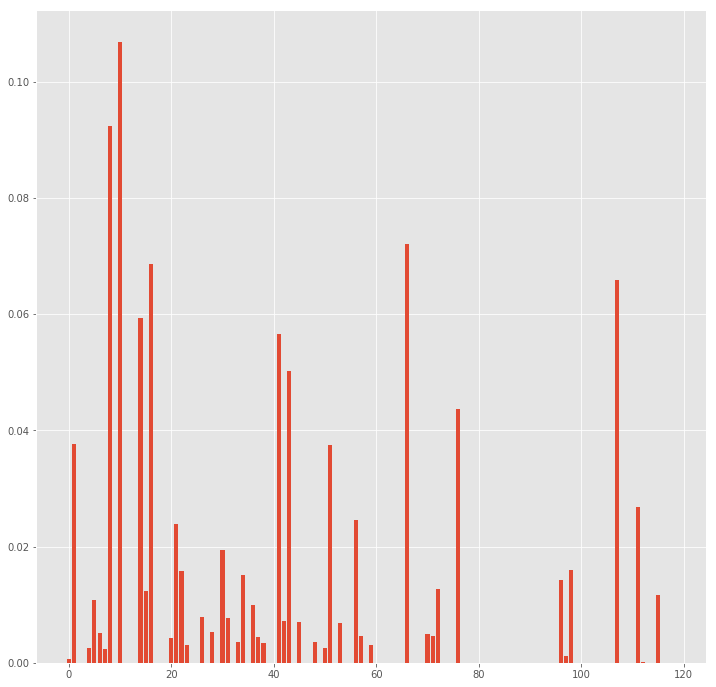

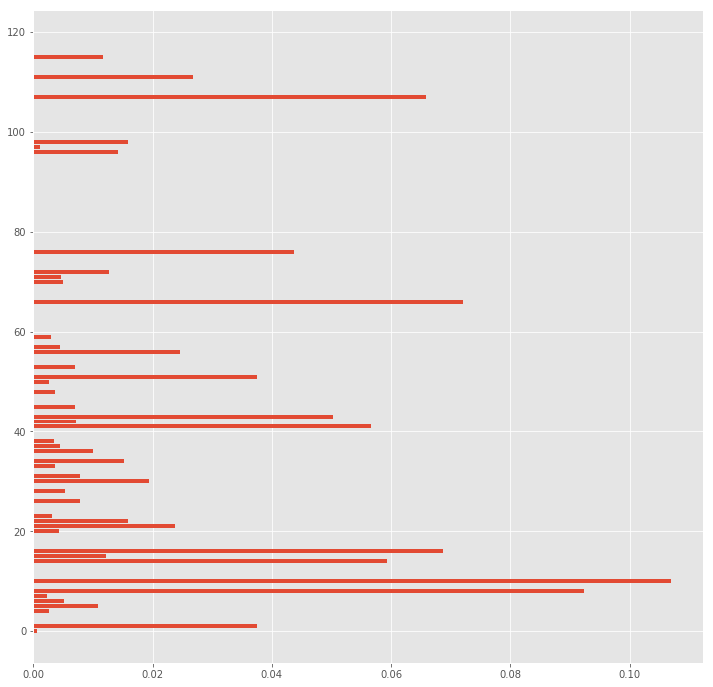

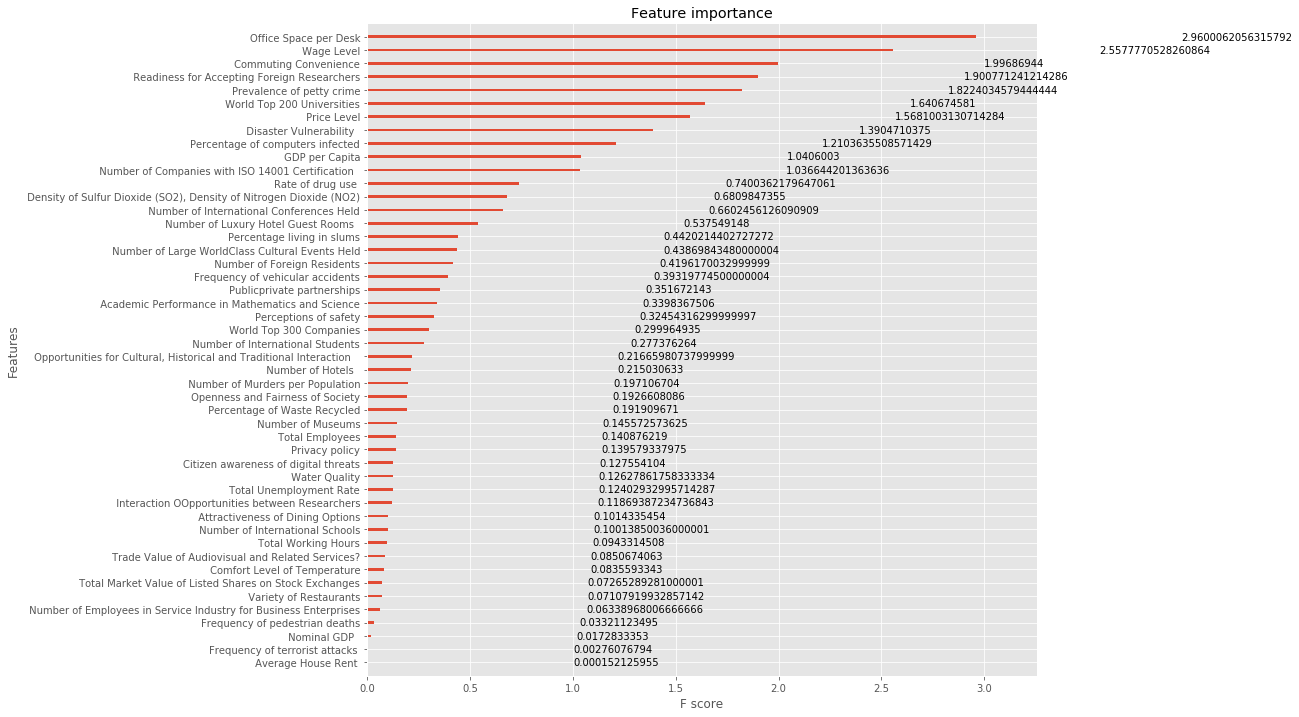

In [17]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt    
from sklearn import metrics   
plt.style.use('ggplot')

y=clusters.values
# fit a ensemble.AdaBoostClassifier() model to the data
model = XGBClassifier()
model.fit(x_second,y)
print(model)
   
# make predictions
expected_y  = y
predicted_y = model.predict(x_second)
    
# summarize the fit of the model
print('XGBClassifier: ')
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

plt.figure(figsize=(12,12))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

plt.figure(figsize=(12,12))
plt.barh(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()    

fig, ax = plt.subplots(figsize=(12,12))
plot_importance(model,importance_type='gain', ax = ax)
plt.show()


In [18]:


# importance_type = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
scores=model.get_booster().get_score(importance_type='gain')


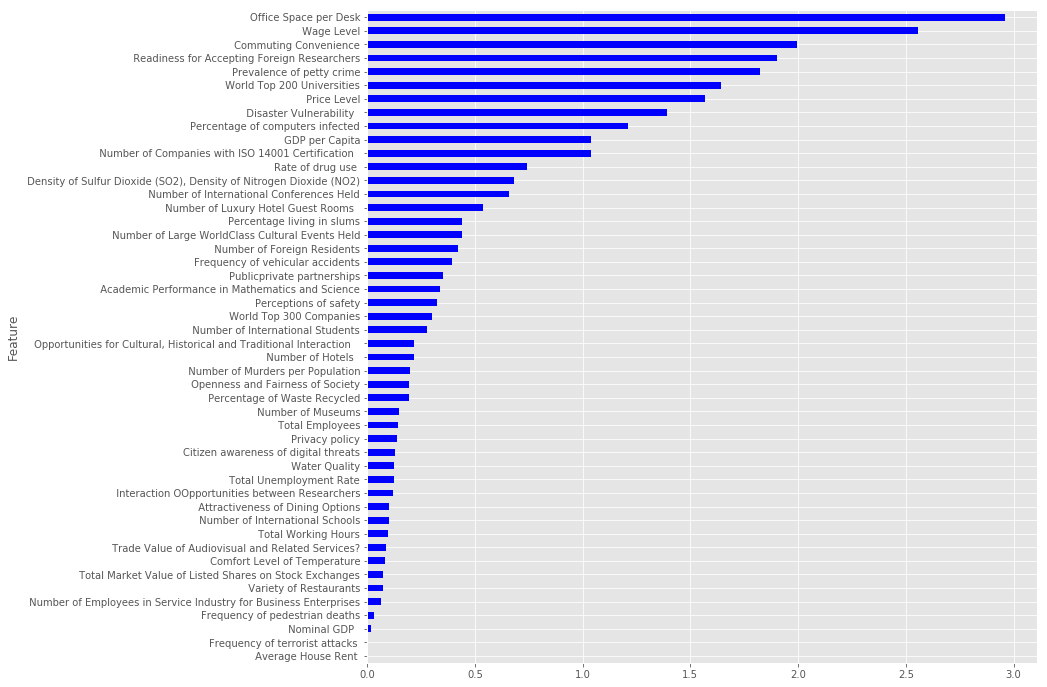

In [19]:
importance = sorted(scores.items())


df = pd.DataFrame(importance, columns=['Feature', 'Importance Gain'])

df=df.sort_values(by=['Importance Gain'] , ascending=True)
df.plot(kind='barh', x='Feature', y='Importance Gain', color='blue',legend=False, figsize=(12, 12))
plt.gcf().savefig('features_importance.png')

In [20]:
gain=(pd.DataFrame(scores, index=[0])).T
gain.columns=['Importance Gain']
gain=gain.sort_values(by=['Importance Gain'] , ascending=False)
gain

,Importance Gain
Office Space per Desk,2.960006
Wage Level,2.557777
Commuting Convenience,1.996869
Readiness for Accepting Foreign Researchers,1.900771
Prevalence of petty crime,1.822403
World Top 200 Universities,1.640675
Price Level,1.568100
Disaster Vulnerability,1.390471
Percentage of computers infected,1.210364
GDP per Capita,1.040600
